<a href="https://colab.research.google.com/github/karthikasi/Task-7/blob/main/Random_Forest_Assignment16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [3]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df["Gender"]=df.Gender.map({"Male":0,"Female":1})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [5]:
X=df[["Gender","Age","EstimatedSalary"]].values
y=df["Purchased"].values

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

**Feature Scaling**

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train,y_train)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [8]:
X_test_scaled

array([[ 0.97530483,  0.77372464,  0.7873414 ],
       [ 0.97530483, -1.79445856, -1.29685233],
       [-1.02532046, -0.17745433, -0.52272323],
       [ 0.97530483, -1.31886908, -1.11820715],
       [-1.02532046,  0.10789936,  0.22163167],
       [-1.02532046, -0.08233643,  0.0132123 ],
       [-1.02532046, -0.36769012, -0.79069099],
       [ 0.97530483,  0.39325305,  0.16208328],
       [-1.02532046, -0.27257222, -0.49294903],
       [ 0.97530483,  0.39325305,  0.28118006],
       [-1.02532046, -0.17745433,  1.65079308],
       [-1.02532046, -1.22375118,  0.60869622],
       [ 0.97530483, -0.8432796 ,  0.40027685],
       [-1.02532046, -0.65304381, -0.10588448],
       [ 0.97530483, -0.27257222, -0.67159421],
       [-1.02532046, -1.79445856, -1.32662652],
       [ 0.97530483, -0.27257222,  2.30582539],
       [-1.02532046,  0.20301726, -0.13565868],
       [-1.02532046, -1.12863329,  0.34072846],
       [-1.02532046, -0.08233643,  0.16208328],
       [ 0.97530483,  0.96396043,  1.472

**Fitting Random Forest to the Training set**

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate model 
rf = RandomForestClassifier(n_estimators= 100, max_depth = 2, max_features='sqrt')

# Train the model on training data
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=2, max_features='sqrt')

Test set accuracy: 0.93
Test set auc: 0.93
Train set AUC :  0.925709939148073


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


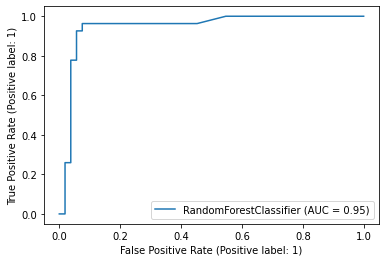

In [12]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve,confusion_matrix
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = rf.predict(X_test_scaled) 

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(rf, X_test_scaled, y_test)


acc = roc_auc_score(y_train, rf.predict(X_train_scaled))
print("Train set AUC : ", acc)

**Predicting the Test set results**

In [11]:
y_pred=rf.predict(X_test_scaled)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1])

**Making the Confusion Matrix**

Confusion Matrix : [[49  4]
 [ 2 25]]


Text(69.0, 0.5, 'Predicted')

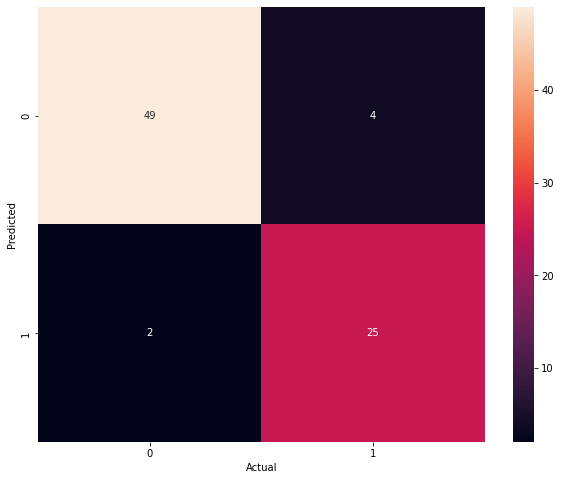

In [15]:
print("Confusion Matrix :",confusion_matrix(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

**Visualising the Training set results**

In [16]:
from sklearn.tree import export_graphviz
import pydot
from sklearn import tree

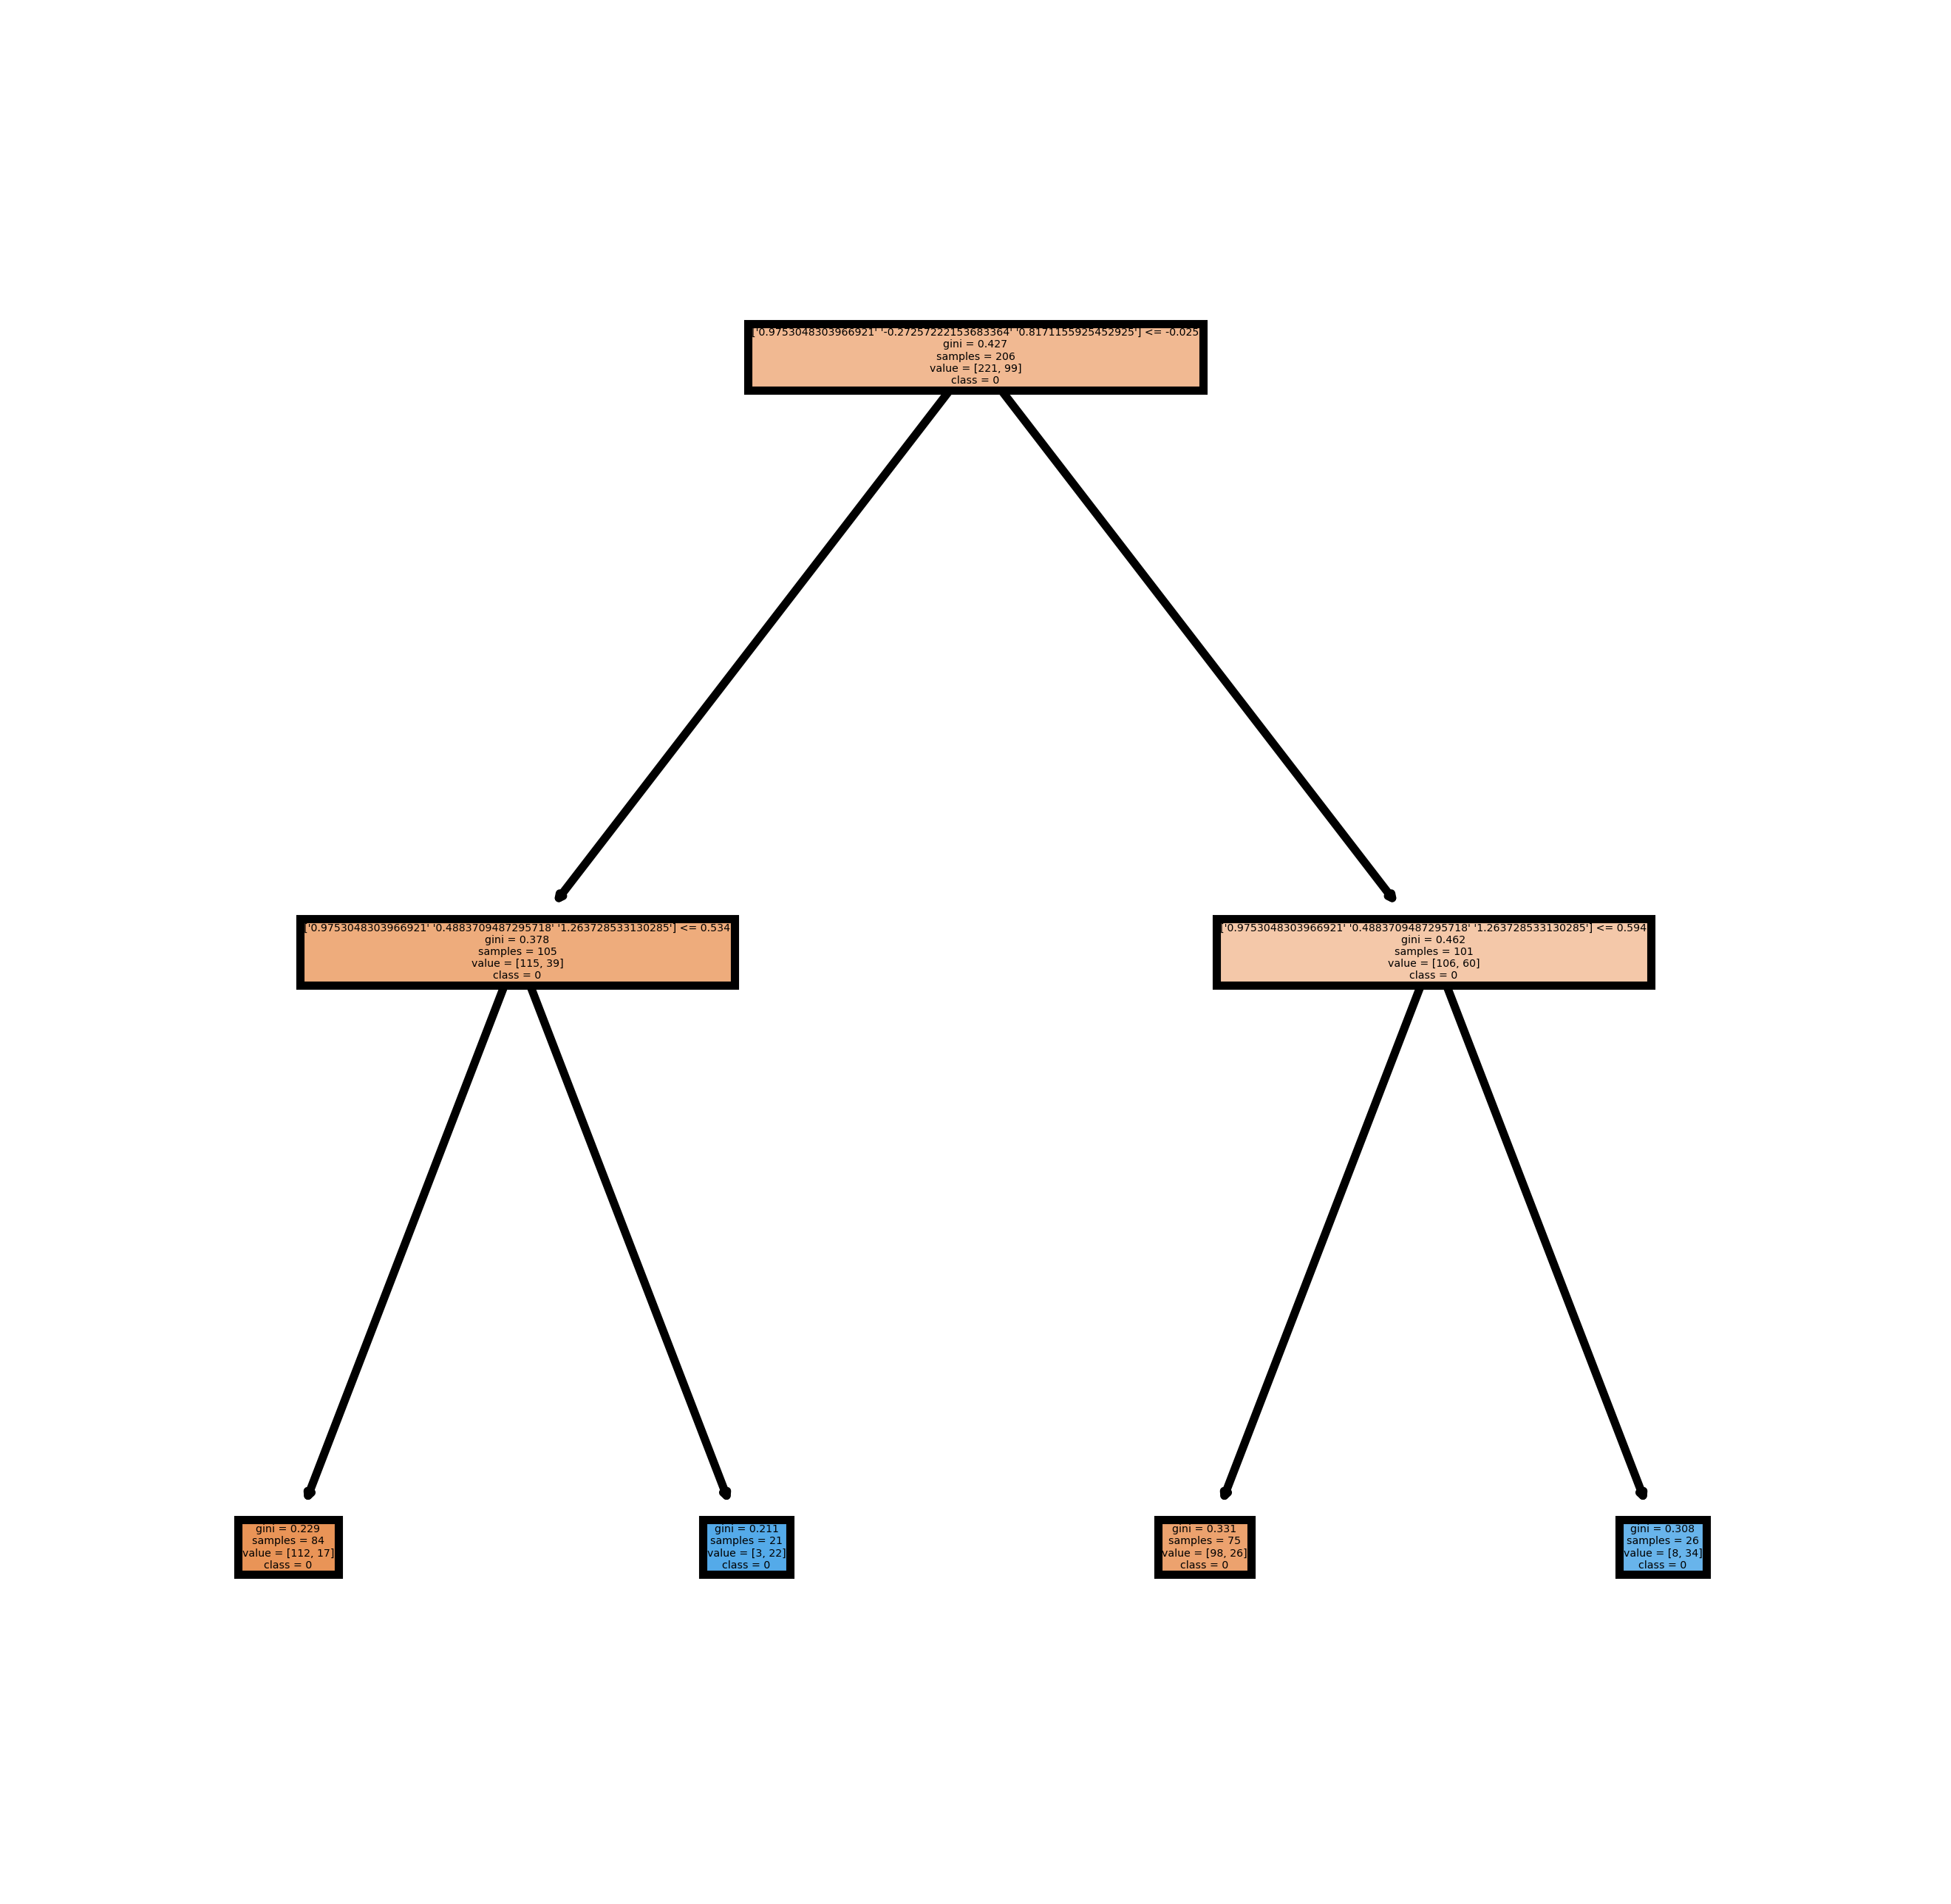

In [17]:
original_feature=df.drop(columns="Purchased")
original_feature_list=list(original_feature.columns)
feature_names=np.array(X_train_scaled).astype('str')
target_names=np.array(y).astype('str')
feature_names_test=np.array(X_test_scaled)
fn=feature_names
cn=target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

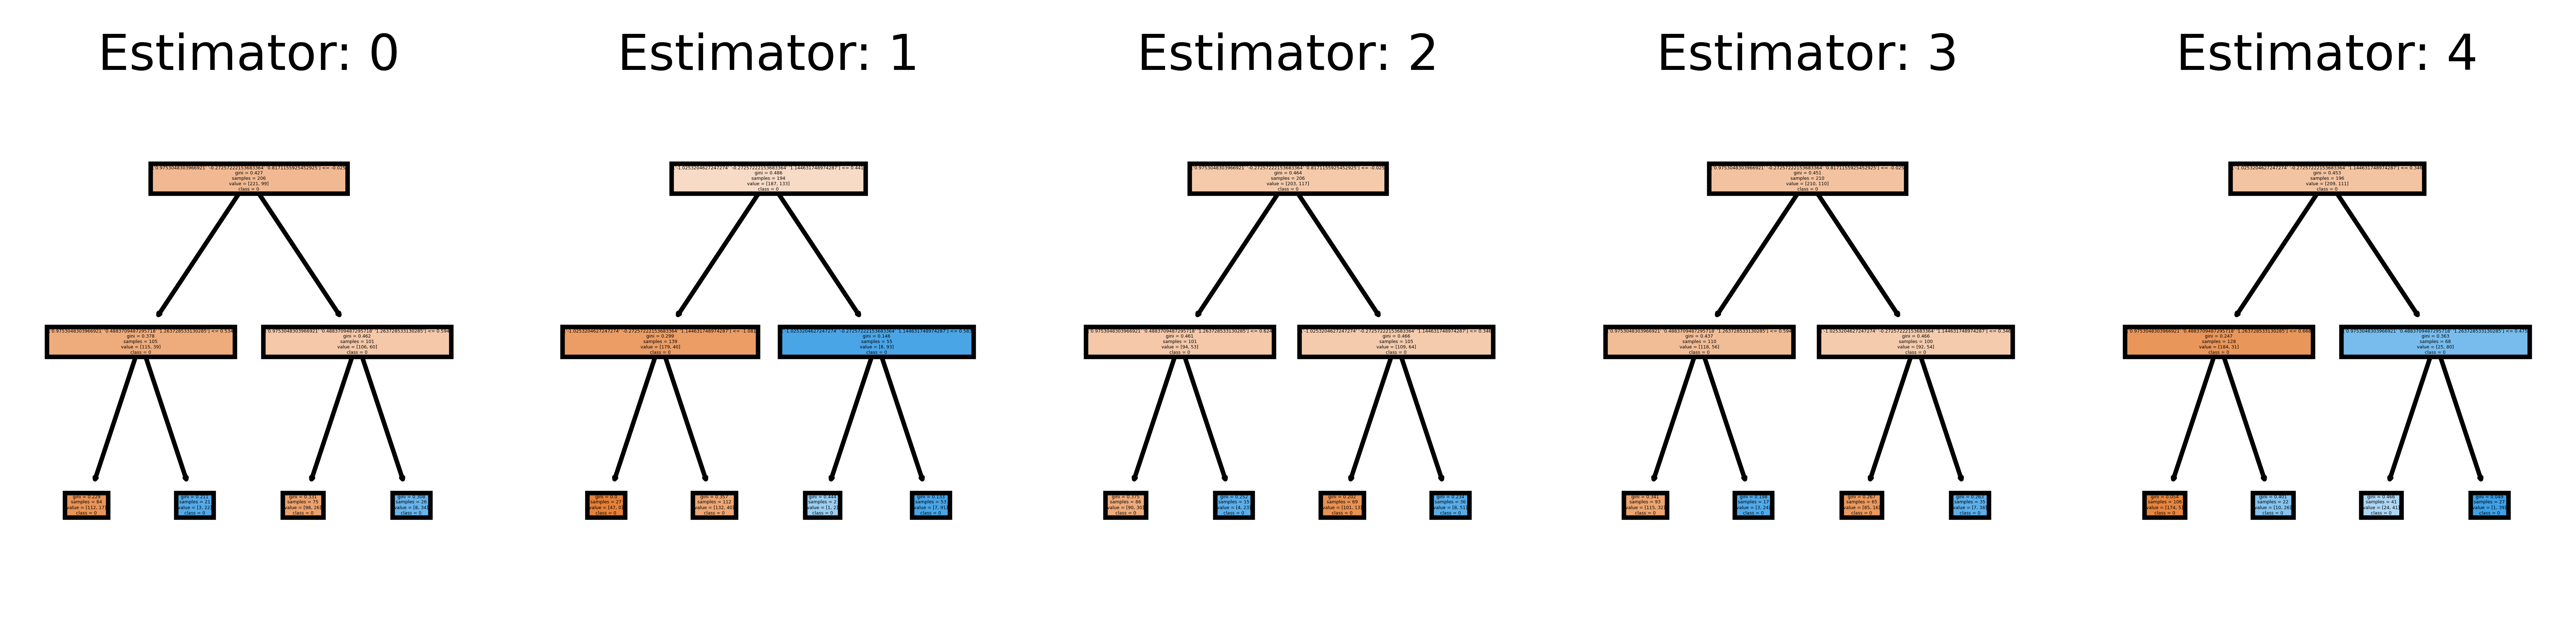

In [18]:
fn=feature_names
cn=target_names
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0,5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

**Visualising the Test set results**

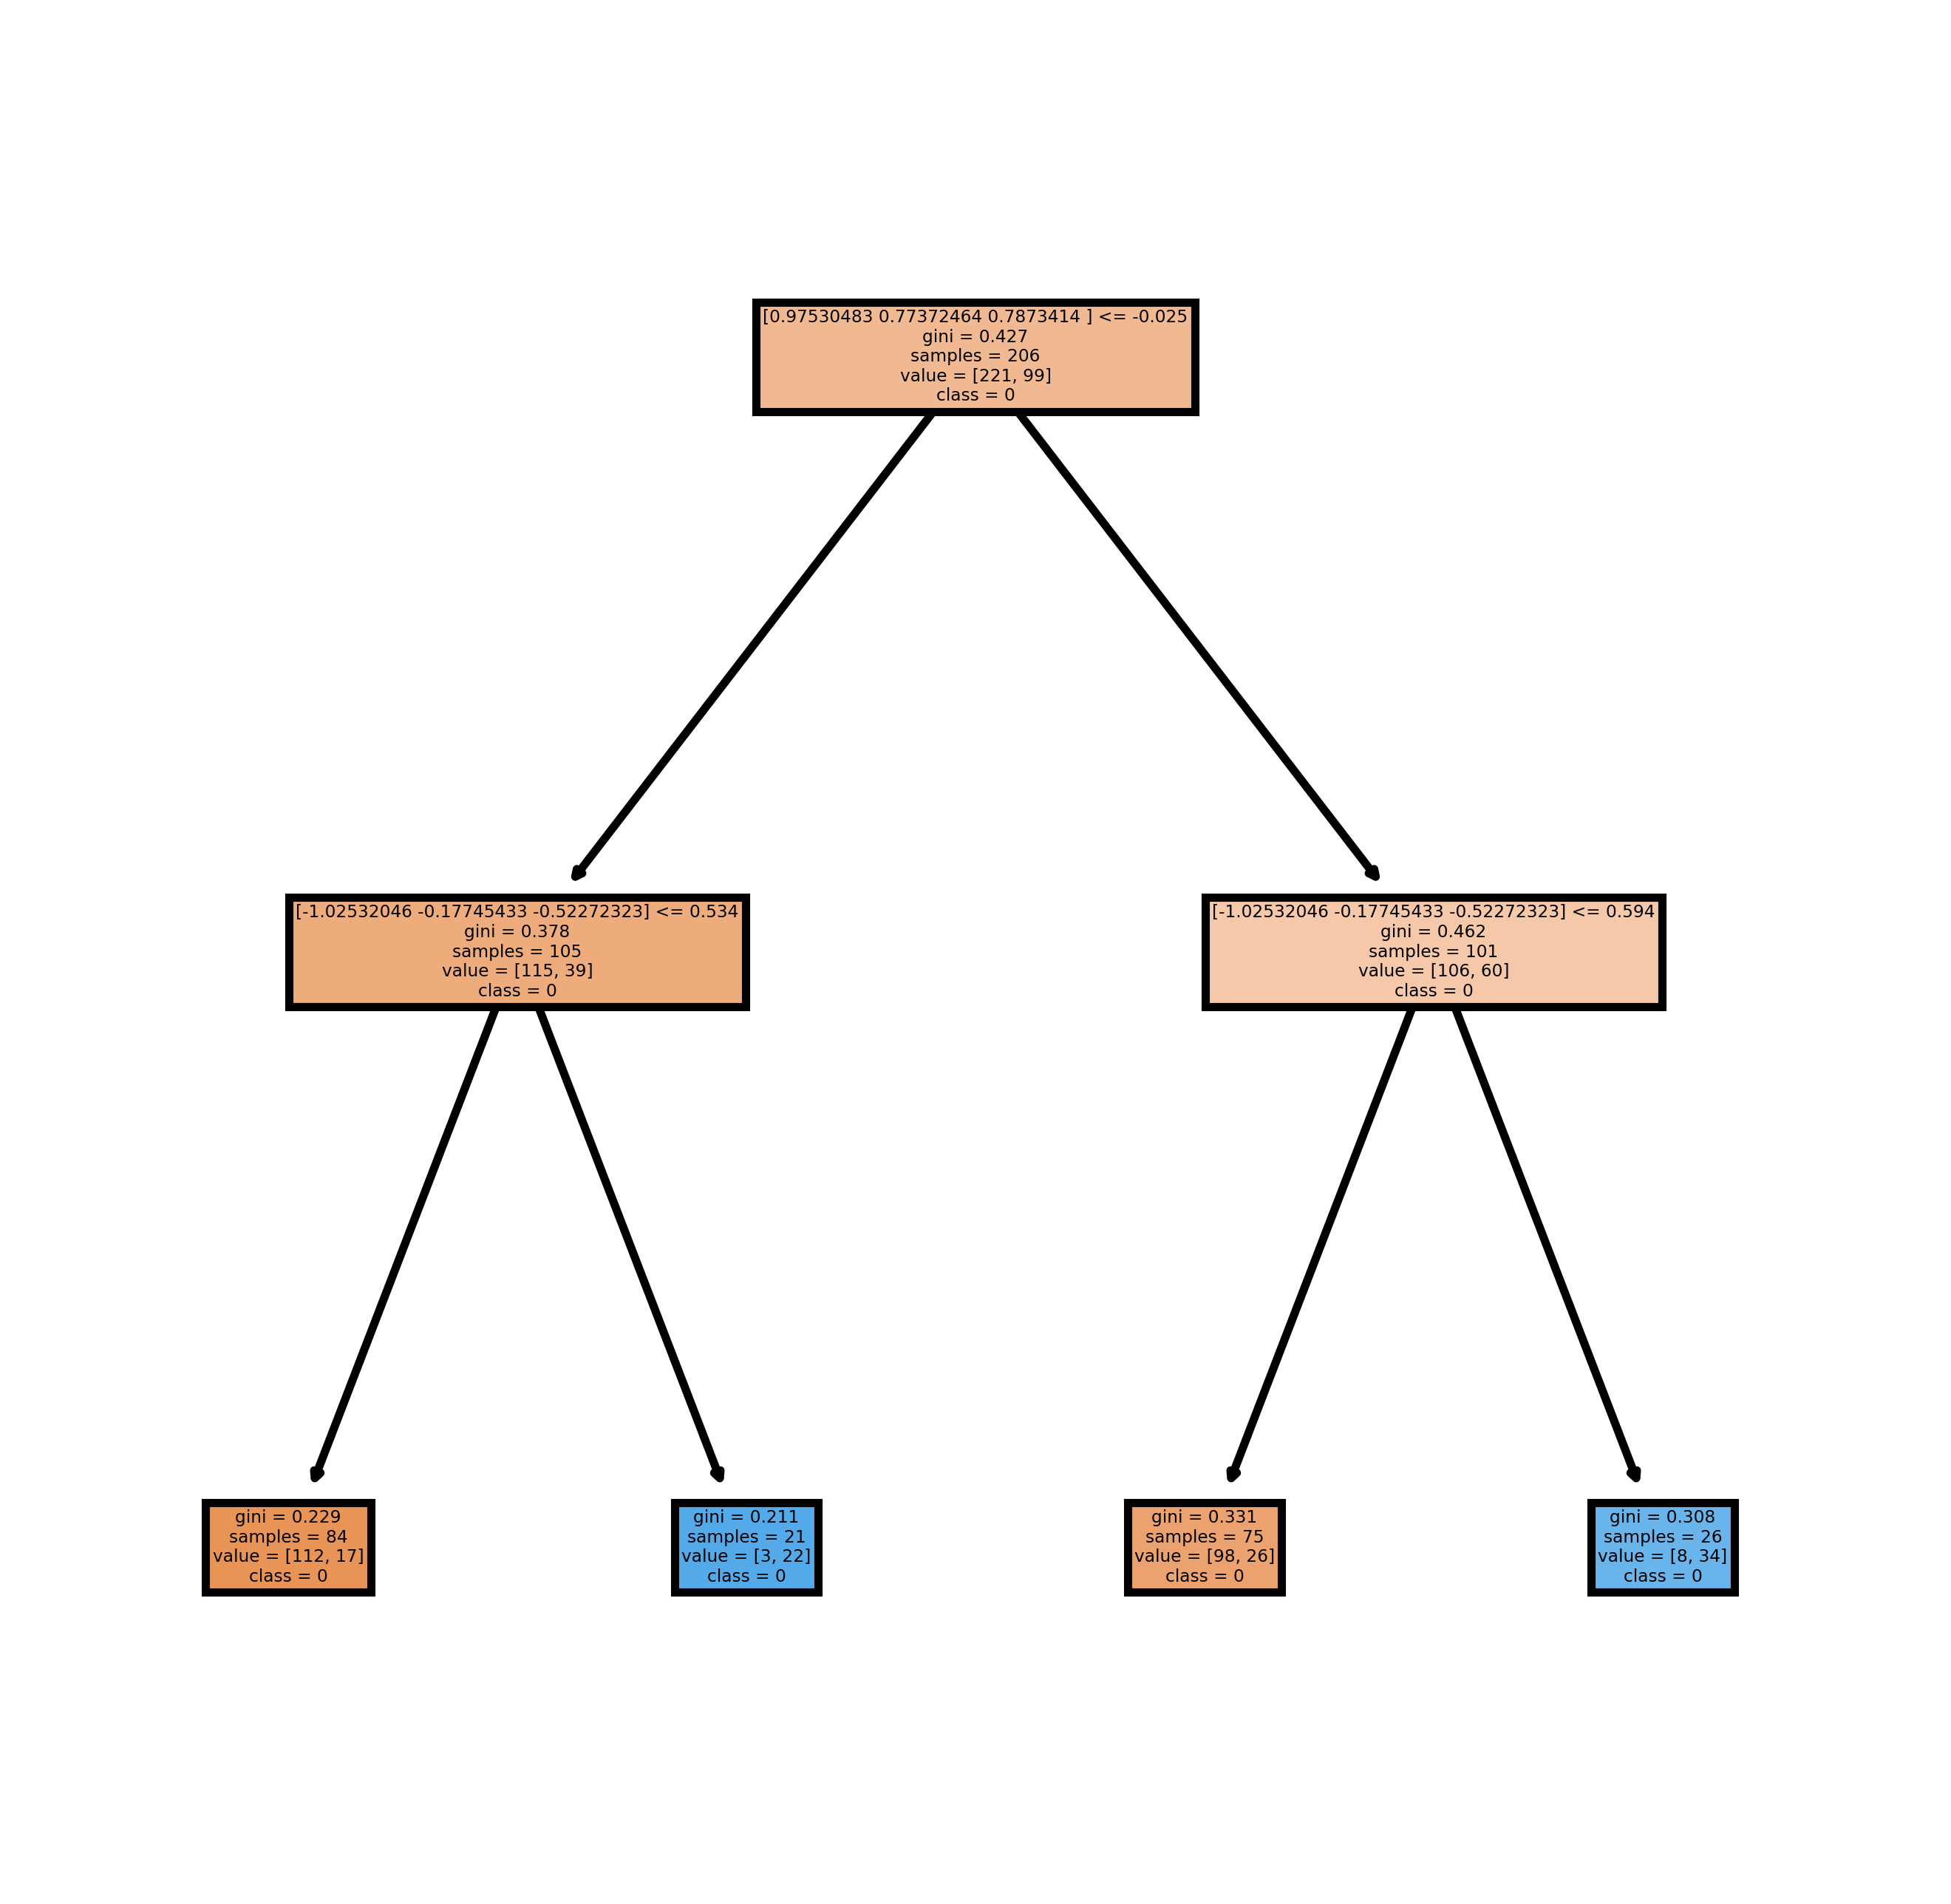

In [19]:
fn=feature_names_test
cn=target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

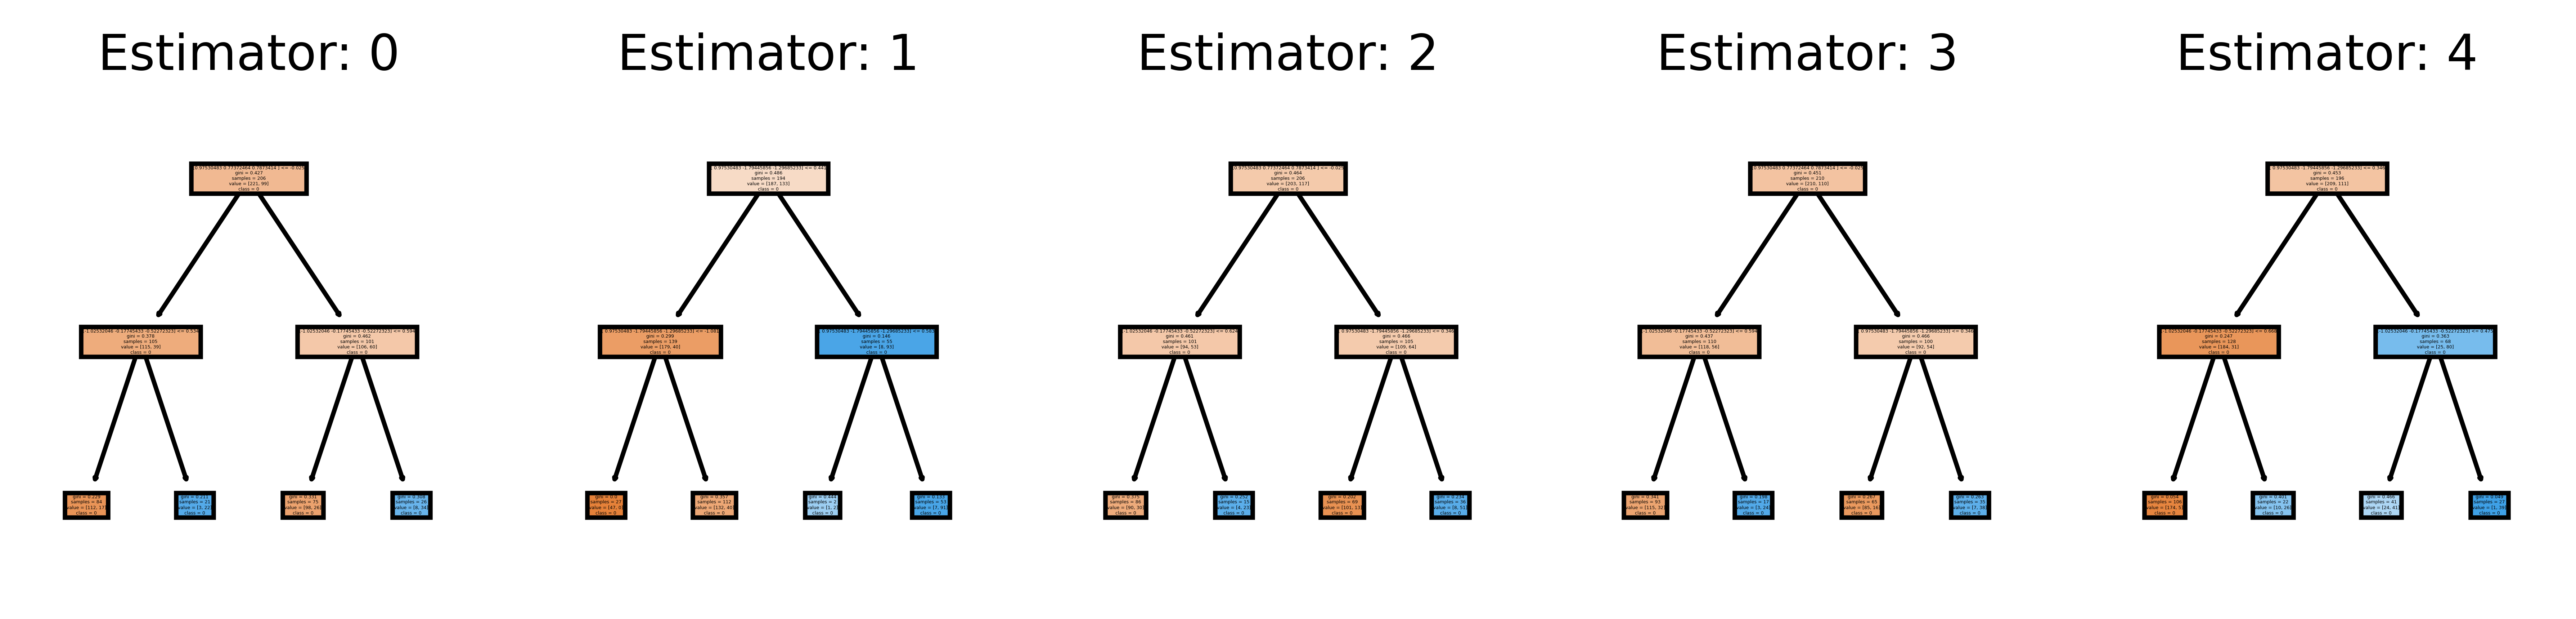

In [20]:
fn=feature_names_test
cn=target_names
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0,5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')